# MLP İle Vücut Kitle İndeksi Veri Seti

Kütüphanelerin import edilmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("bmi.csv")

In [3]:
columns = ["Height", "Weight", "Index"]
target_predict = ["Gender"]

In [4]:
#bu veri seti çok output sahip bir veri setidir. toplam beş sonuç bulunur ve buna göre obezite tahmini yapar.


df.head()

Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3

In [5]:
#sütunlar

df.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [6]:
#dataset bilgisi

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000

In [8]:
df.shape

(500, 4)

In [9]:
print(df.dtypes)

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object


In [10]:
df['Index']

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64

# eksik verilerin kontrolü

In [11]:
eksik=df.isnull().sum()
eksik_tablo = pd.DataFrame({"Eksik Değer Sayısı" : eksik})
eksik_tablo

Eksik Değer Sayısı
Gender                   0
Height                   0
Weight                   0
Index                    0

In [12]:
#Veri kümesinde 0 tekrarlanan değer var. Bu temizlemeden, veri setinin süreci analiz etmek için iyi bir set olduğu sonucuna varabiliriz.

print(df.isnull().sum().sum())

0


In [13]:
gender_ = LabelEncoder()
df['Gender'] = gender_.fit_transform(df['Gender'])

In [14]:
#bağımlı ve bağımsız değişkenler belirlendi. burada y yani index sütnu diğer sutunlara bağımlıdır.

X = df.drop('Index', axis = 1)
y = df['Index']

In [15]:
#eğitim ve test olarak veri seti ayrıldı.


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
#ölçeklendirme yapıldı.


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Mlp

In [17]:
#ilk olarak gerekli kütüphane çağrıldı.

from sklearn.neural_network import MLPClassifier

#MLP nesnesinin oluşturulması ve fit edilmesi
mlpc=MLPClassifier(random_state=1)
mlpc.fit(X_train,y_train)


#burada veri seti için ideal parametreler görülmektedir.

C:\Users\BEYZA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

In [18]:
#validation yapılmamış nesne ile tahmin

y_pred = mlpc.predict(X_test)

In [19]:
#acc

import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.66


In [20]:
#yukarıda solver için 'adam' göteriyor fakat veri seti küçük olduğu için 'lbfgs' kullanıldı.

mlpc_2=MLPClassifier(random_state=1,solver="lbfgs",activation="relu",hidden_layer_sizes=(2,4))
mlpc_2.fit(X_train,y_train)
print("mlpc_2 score:",mlpc_2.score(X_test,y_test))

mlpc_2 score: 0.39


In [21]:
#gerekli parametreler

mlpc_params = {"alpha": [0.1, 0.01, 0.001],
              "hidden_layer_sizes": [(100,100),
                                     (100,100,100)],
              "solver" : ["adam","sgd","lbfgs"],
              "activation": ["relu","logistic"]
              }

# gridsearch

In [22]:
from sklearn.model_selection import GridSearchCV


#Model nesnesi

mlpc = MLPClassifier(random_state = 0) 
 
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 5, #5 Katlı 
                         n_jobs = -1, 
                         verbose = 2)

In [23]:
mlpc_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\BEYZA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=0), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.001],
                         'hidden_layer_sizes': [(100, 100), (100, 100, 100)],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             verbose=2)

In [24]:
#en iyi parametrelerin belirlenmesi

print(mlpc_cv_model.best_params_)

{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'lbfgs'}


In [25]:
#Uygun parametreleri seçtiğimiz için skorda yükselme oldu.
mlpc_tuned=MLPClassifier(alpha=0.1,hidden_layer_sizes=(100,100),solver="lbfgs").fit(X_train,y_train)
print("skor:",mlpc_tuned.score(X_test,y_test))

skor: 0.95


C:\Users\BEYZA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [26]:
#cross val ve k-fold


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(shuffle=True, n_splits=5) # 5 katlı

cv_results_kfold = cross_val_score(mlpc_tuned, X_test, y_test, cv=kf)


C:\Users\BEYZA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\BEYZA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\BEYZA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs faile

In [27]:
print("Kfold Cross-Val acc: ",cv_results_kfold)

Kfold Cross-Val acc:  [1.   0.8  0.85 0.9  0.9 ]


In [28]:
y_pred = mlpc_tuned.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report 

In [30]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.83      0.91         6
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00        15
           4       0.93      0.93      0.93        27
           5       0.95      0.97      0.96        39

    accuracy                           0.95       100
   macro avg       0.81      0.78      0.79       100
weighted avg       0.96      0.95      0.95       100



C:\Users\BEYZA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BEYZA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BEYZA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  0  0  0  0  0]
 [ 1  5  0  0  0  0]
 [ 0  0 12  0  1  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 25  2]
 [ 0  0  0  0  1 38]]


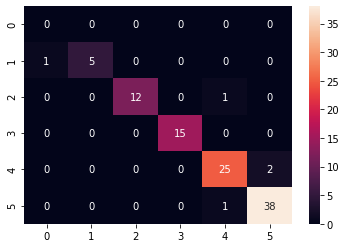

In [32]:
#seaborn ile görselleştirme yapıldı.


sns.heatmap(cm,annot=True)
plt.savefig('hm.png')